In [1]:
pip install tensorflow matplotlib numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
def generate_synthetic_data(num_samples, img_shape):
    return np.random.rand(num_samples, *img_shape)

# Example: 1000 samples of 28x28 images with 3 color channels
synthetic_data = generate_synthetic_data(1000, (28, 28, 3))

In [4]:
def build_generator(latent_dim):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(256, activation='relu'),
        layers.Dense(28 * 28 * 3, activation='tanh'),
        layers.Reshape((28, 28, 3))
    ])
    return model

In [5]:
def build_discriminator(img_shape):
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=img_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [6]:
def build_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    
    gan_input = layers.Input(shape=(latent_dim,))
    img = generator(gan_input)
    gan_output = discriminator(img)
    
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return gan

In [13]:
def train_gan(epochs, batch_size):
    half_batch = batch_size // 2
    
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, synthetic_data.shape[0], half_batch)
        real_imgs = synthetic_data[idx]
        
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_imgs = generator.predict(noise)
        
        d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((half_batch, 1)))
        
        # Calculate average discriminator loss
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Unpack D loss (assuming d_loss returns a list)
        if isinstance(d_loss, list):
            d_loss_value, d_accuracy = d_loss
        else:
            d_loss_value = d_loss  # if it's a single loss value, set accordingly
            d_accuracy = 0  # placeholder if you don't have accuracy

        # Print the progress
        print(f"{epoch}/{epochs} [D loss: {d_loss_value:.4f}, acc.: {100 * d_accuracy:.2f}] [G loss: {g_loss:.4f}]")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


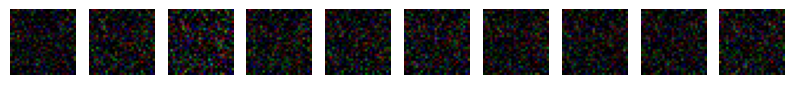

In [16]:
def generate_images(num_images=10):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)

    # Ensure the pixel values are in the range [0, 1]
    generated_images = np.clip(generated_images, 0, 1)

    # Plot the generated images
    plt.figure(figsize=(num_images, 1))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i])
        plt.axis('off')
    plt.show()

# Generate and display new images
generate_images(10)